# Linear Regression with Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Linear Regression model (without Regularization)
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, noise=10, n_samples=1000, random_state=42)   

In [3]:
X[:5], y[:5]

(array([[-1.75873949],
        [ 1.03184454],
        [-0.48760622],
        [ 0.18645431],
        [ 0.72576662]]),
 array([-32.77038605,   3.50459106, -17.93030767,  -3.99020124,
         13.10526434]))

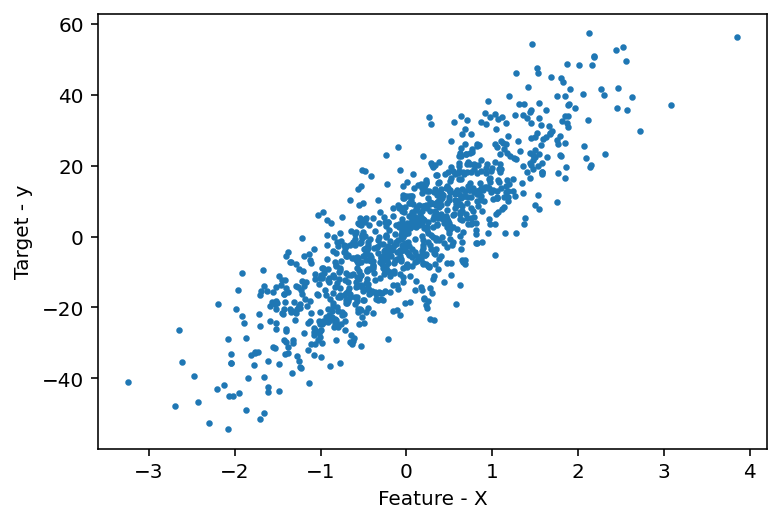

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.scatter(X, y, s=5)

In [5]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([16.63354605]), 0.045262059058209514)

In [6]:
# Predicting using trained model
y_pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

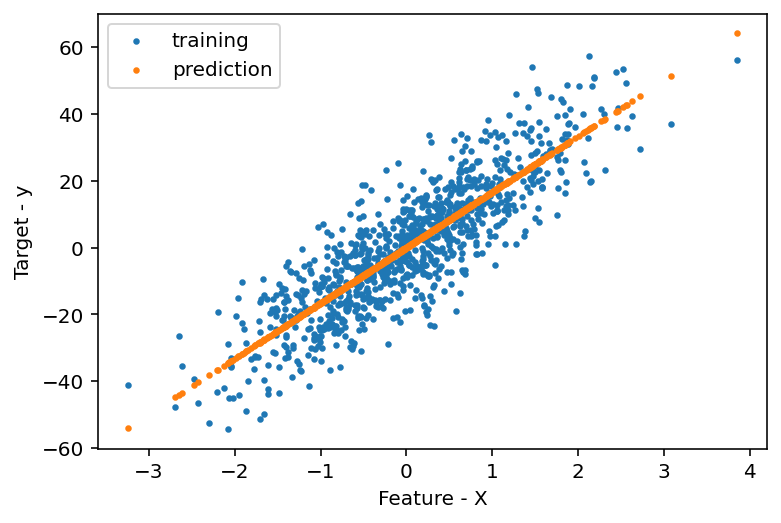

In [7]:
plt.scatter(X, y, s=5, label='training')
plt.scatter(X, y_pred, s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.legend()
plt.show()

## Regularized Regression Methods 
- Ridge Regression
  * Ridge Regression imposes penalty on size of coef.
  * Less impacted by outliers.

In [8]:
outliers = y[950:] - 600; outliers

array([-620.72518918, -607.24456936, -602.35967987, -589.77927836,
       -606.97474711, -602.5249083 , -617.53354476, -581.41160958,
       -568.58829982, -588.48103465, -576.37267804, -608.20115427,
       -627.62758019, -629.16862648, -600.74874687, -603.71586107,
       -597.22691815, -589.89284288, -587.08855694, -612.90456844,
       -607.72930237, -606.38449017, -592.78147515, -564.34789926,
       -579.47960861, -596.20989757, -608.437806  , -595.54249235,
       -605.14184967, -585.14253937, -602.46852941, -591.20272709,
       -576.61995697, -624.29969481, -633.11859313, -584.0344489 ,
       -580.06411958, -602.36414388, -600.03658325, -598.97777085,
       -600.7449772 , -588.33620239, -610.44463741, -620.9629963 ,
       -613.84011222, -622.5064205 , -586.40905438, -591.93411712,
       -562.64219745, -611.96087644])

In [9]:
import numpy as np
y_out = np.append(y[:950], outliers)

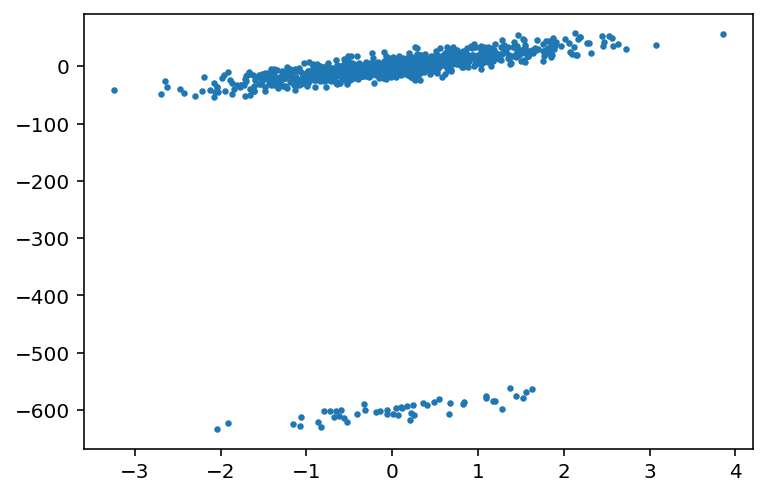

In [10]:
plt.scatter(X, y_out, s=5)

In [11]:
lr = LinearRegression()
lr.fit(X, y_out)
y_out_pred = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

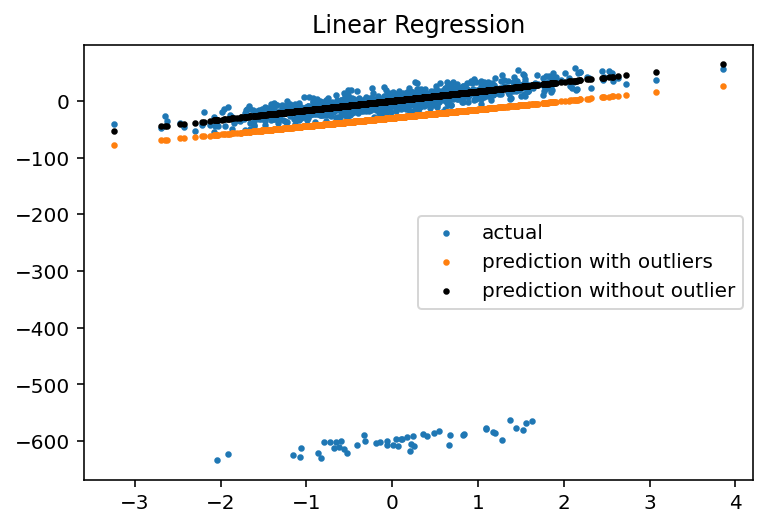

In [12]:
plt.scatter(X, y_out, s=5, label='actual')
plt.scatter(X, y_out_pred, s=5, label='prediction with outliers')
plt.scatter(X, y_pred,s=5, c='k', label='prediction without outlier')
plt.legend() 
plt.title('Linear Regression')

In [ ]:
lr.coef_, lr.intercept_

(array([14.75586098]), -29.918438428236247)

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(X, y_out)
y_ridge_pred = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

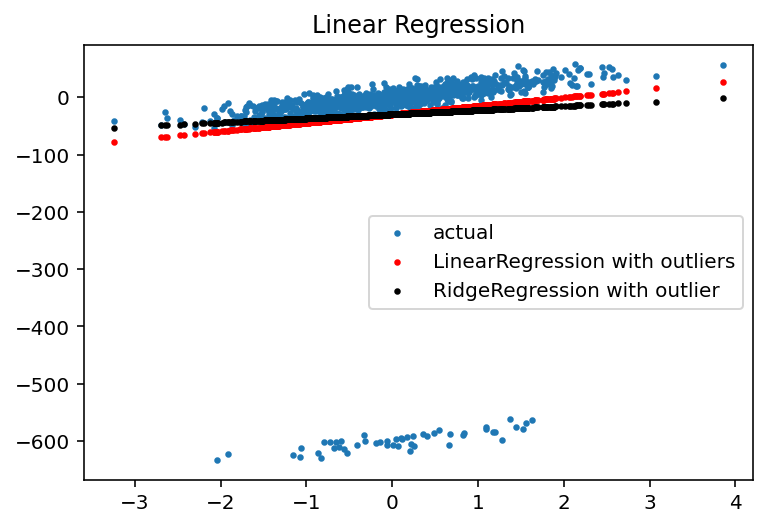

In [16]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [17]:
ridge.coef_, ridge.intercept_    # 기울기 coefficient(w) 가 값이 훨씬 작아짐.

(array([7.21930478]), -29.77274130320161)

In [18]:
lasso = Lasso(alpha=1000)
lasso.fit(X, y_out)
y_lasso_pred = lasso.predict(X)

Text(0.5, 1.0, 'Linear Regression')

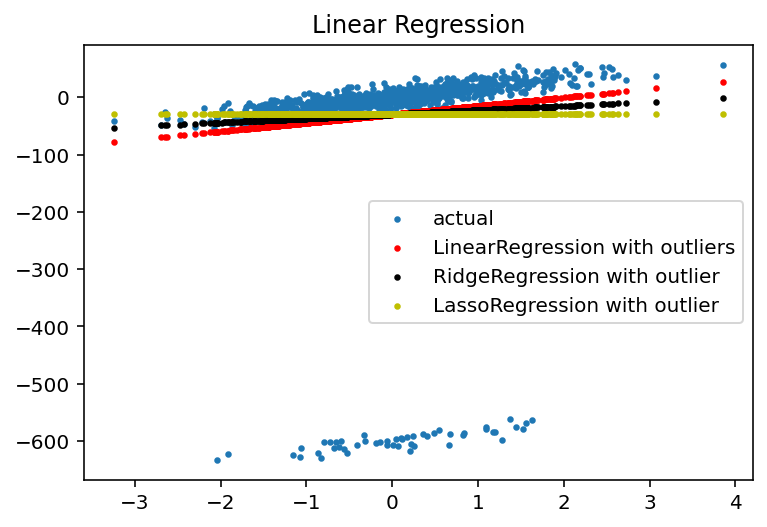

In [19]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outlier')
plt.scatter(X, y_lasso_pred,s=5,c='y', label='LassoRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [20]:
lasso.coef_, lasso.intercept_

(array([0.]), -29.63317730014139)

## Effects of alpha using Ridge on Coefficients 

In [21]:
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)
# w: The coefficient of the underlying linear model. It is returned only if coef is True.

In [22]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

- Training Ridge for different values of alpha
  * Coefs calculated are appended to a list
  * Generate 20 alphas from 10^-6 to 10^6

In [23]:
alphas = np.logspace(-3, 5, 200)
alphas[:20], alphas[-20:]

(array([0.001     , 0.00109699, 0.00120338, 0.00132009, 0.00144812,
        0.00158857, 0.00174263, 0.00191164, 0.00209705, 0.00230043,
        0.00252354, 0.00276829, 0.00303677, 0.00333129, 0.00365438,
        0.00400881, 0.0043976 , 0.00482411, 0.00529198, 0.00580523]),
 array([ 17225.85965399,  18896.52339691,  20729.21779595,  22739.65752358,
         24945.0813523 ,  27364.39997075,  30018.35813576,  32929.71255097,
         36123.42699709,  39626.88638701,  43470.13158125,  47686.11697714,
         52310.99308056,  57384.41648302,  62949.88990222,  69055.13520162,
         75752.50258772,  83099.41949353,  91158.88299751, 100000.        ]))

In [24]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [25]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

In [26]:
coefs[:5]

[array([32.12547819, 76.33071941, 33.69264671,  9.42759217,  5.16620902,
        58.28688033, 29.43478769,  7.18074889, 10.30191419, 75.31989693]),
 array([32.12547439, 76.33071085, 33.69264275,  9.42759163,  5.16620819,
        58.28687492, 29.43478488,  7.18074834, 10.30191368, 75.31988982]),
 array([32.12547022, 76.33070145, 33.69263841,  9.42759103,  5.16620728,
        58.28686898, 29.4347818 ,  7.18074774, 10.30191312, 75.31988203]),
 array([32.12546566, 76.33069115, 33.69263365,  9.42759038,  5.16620628,
        58.28686247, 29.43477841,  7.18074708, 10.30191251, 75.31987348]),
 array([32.12546064, 76.33067984, 33.69262843,  9.42758966,  5.16620518,
        58.28685533, 29.43477471,  7.18074636, 10.30191184, 75.3198641 ])]

In [27]:
coefs[-5:]   # w 값이 굉장히 작아짐을 볼 수 있다.

[array([0.36905501, 0.94856311, 0.38307061, 0.18174143, 0.03080575,
        0.87029109, 0.43753906, 0.11359349, 0.22092661, 1.11708021]),
 array([0.3367566 , 0.86565699, 0.34953102, 0.1659322 , 0.02807343,
        0.79439856, 0.3993917 , 0.10368337, 0.2017385 , 1.01966879]),
 array([0.30725841, 0.78992058, 0.31890168, 0.15147756, 0.02558406,
        0.72504039, 0.36452758, 0.09462722, 0.18418953, 0.93064419]),
 array([0.28032211, 0.72074665, 0.29093448, 0.1382649 , 0.02331595,
        0.66166797, 0.33267124, 0.08635322, 0.16814427, 0.84930233]),
 array([0.2557289 , 0.65757725, 0.26540173, 0.12619038, 0.02124935,
        0.60377642, 0.30356917, 0.07879532, 0.15347768, 0.77499522])]

- Plotting alphas & coefs: different colors represents different coefs

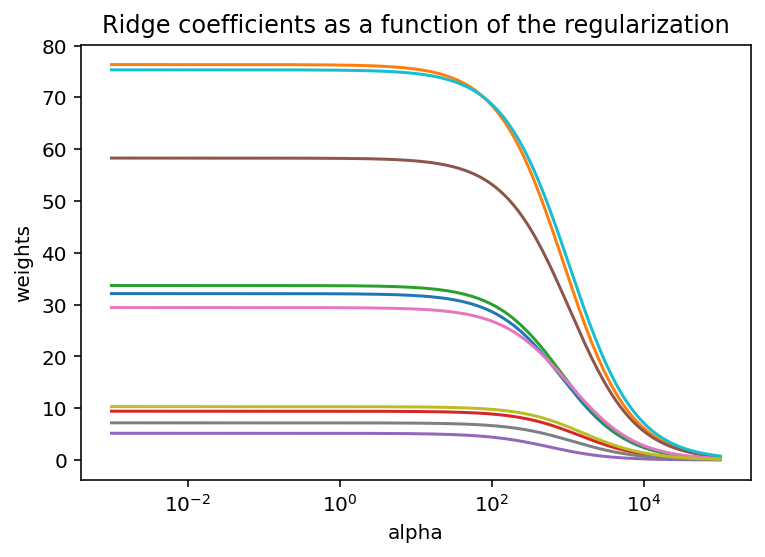

In [28]:
ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword 
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

- Conclusion
  * As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
  * For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

## Lasso

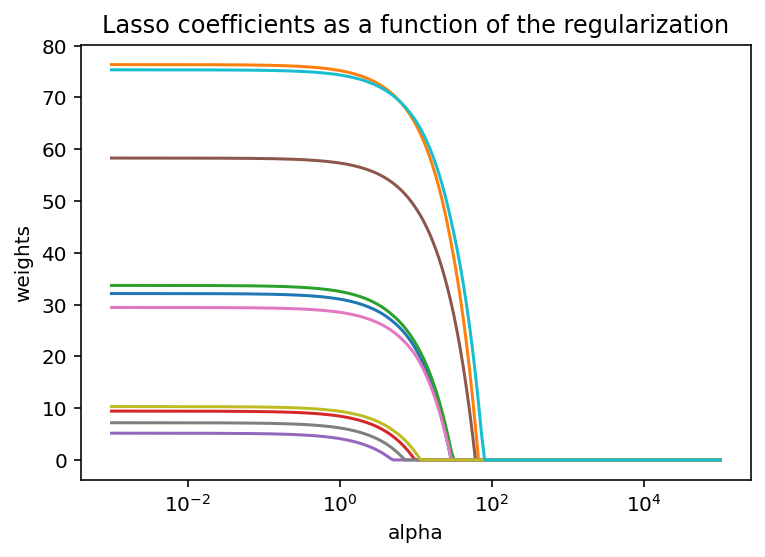

In [29]:
# lasso 
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)

alphas = np.logspace(-3, 5, 200)
coefs = []
for a in alphas:
    lasso = Lasso(max_iter=10000, alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword 
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()


## Example - Indian Supermarket

In [ ]:
# data to train and test
!curl -L https://bit.ly/2HsDP2p -o train.csv
!curl -L https://bit.ly/2WgqtdO -o test.csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0   1042      0 --:--:-- --:--:-- --:--:--  1035
100   142    0   142    0     0    522      0 --:--:-- --:--:-- --:--:--   522
100   318  100   318    0     0    643      0 --:--:-- --:--:-- --:--:--   643
100  849k  100  849k    0     0   328k      0  0:00:02  0:00:02 --:--:-- 1039k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    380      0 --:--:-- --:--:-- --:--:--   380
100   141    0   141    0     0    280      0 --:--:-- --:--:-- --:--:--     0
100   318  100   318    0     0    437      0 --:--:-- --:--:-- --:--:--   437
100  515k  100  515k    0     0   224k      0  0:00:02  0:00:02 --:--:--  747k


In [ ]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.lower()
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].str.lower()
test_df['Item_Fat_Content'].replace(["lf","reg"], ["low fat","regular"], inplace=True)
train_df['Item_Fat_Content'].replace(["lf","reg"], ["low fat","regular"], inplace=True)

In [ ]:
train_df['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df['Item_Fat_Content'].value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,low fat,regular,low fat,regular,low fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [ ]:
test_df.head().T

,0,1,2,3,4
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38
Item_Weight,20.75,8.3,14.6,7.315,NaN
Item_Fat_Content,low fat,regular,low fat,low fat,regular
Item_Visibility,0.00756484,0.0384277,0.0995749,0.0153884,0.118599
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy
Item_MRP,107.862,87.3198,241.754,155.034,234.23
Outlet_Identifier,OUT049,OUT017,OUT010,OUT017,OUT027
Outlet_Establishment_Year,1999,2007,1998,2007,1985
Outlet_Size,Medium,NaN,NaN,NaN,Medium
Outlet_Location_Type,Tier 1,Tier 2,Tier 3,Tier 2,Tier 3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- let's use two features

In [ ]:
X, y = train_df.loc[:,['Outlet_Establishment_Year','Item_MRP']], train_df['Item_Outlet_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

mse = np.mean((pred - y_test)**2)

print(mse, mse**(0.5))             # mse and rmse
print(lreg.score(x_test, y_test))  # r2-score

1990314.408656445 1410.7850327588696
0.3242020337746537


In [ ]:
lreg.coef_, x_train.columns

(array([-9.63343761, 15.64158088]),
 Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object'))

In [ ]:
# 선형모델 계수 출력

coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


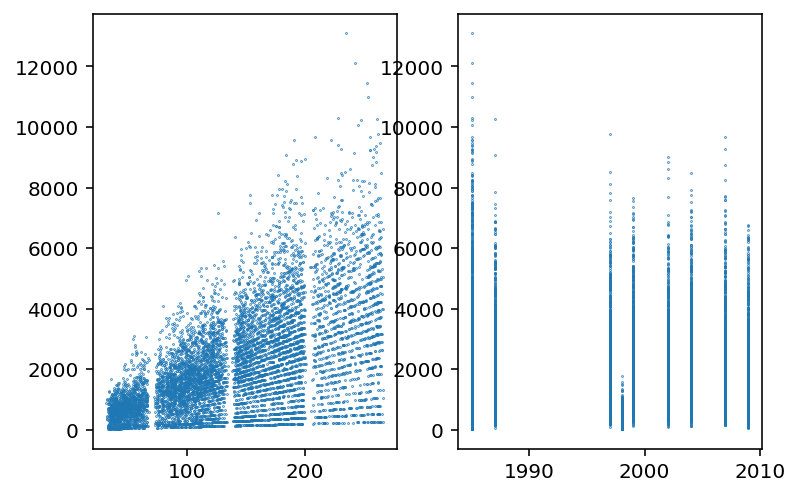

In [ ]:
plt.subplot(1,2,1)
plt.scatter(train_df.Item_MRP, train_df.Item_Outlet_Sales, s=0.1)
plt.subplot(1,2,2)
plt.scatter(train_df.Outlet_Establishment_Year, train_df.Item_Outlet_Sales, s=0.1)

- 매출이 설립연도와는 음의 관계, 상품가격에는 양의 관계.

- let's use all features

In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 무게를 평균치로 대체
train_df['Item_Weight'].fillna((train_df['Item_Weight'].mean()), inplace=True)

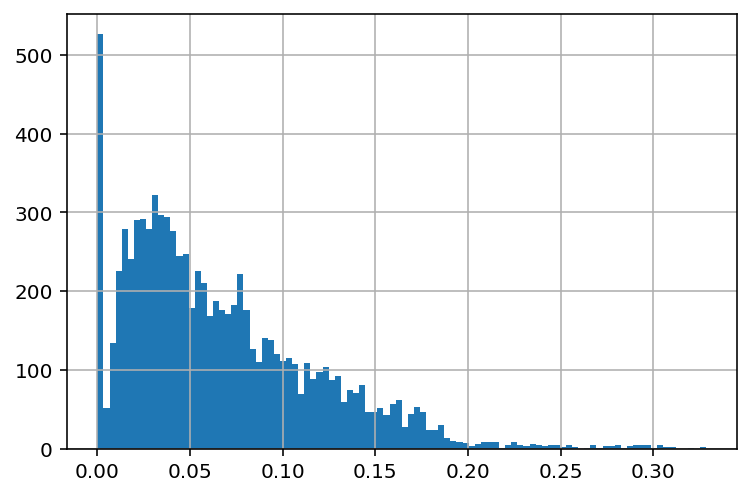

In [ ]:
train_df.Item_Visibility.hist(bins=100)   # 상품의 가시성

- 결측치는 아니지만 값이 의미없는 값인 0 이 많다. 실제로는 결측치로 보고 평균치로 대체

In [ ]:
# 0을 평균치로 대체
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0,np.mean(train_df['Item_Visibility']))

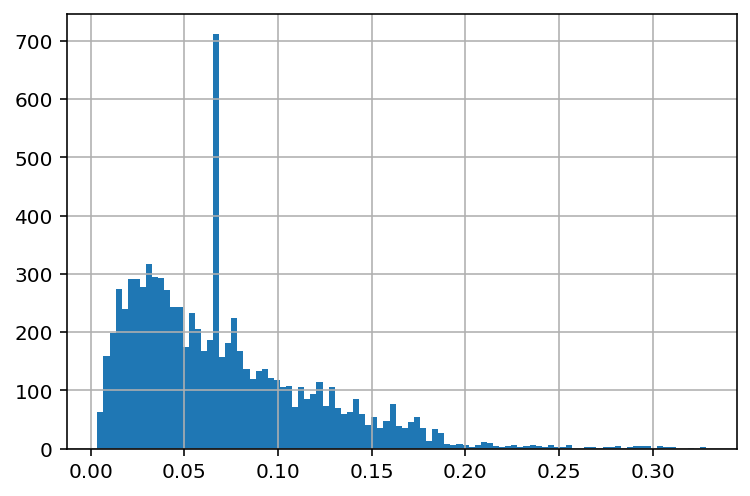

In [ ]:
train_df.Item_Visibility.hist(bins=100)

In [ ]:
train_df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

- 설립연도보다는 설립연도 후 경과한 연수로 바꾸는 게 좋다.

In [ ]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train_df['Outlet_Establishment_Year'] = 2013 - train_df['Outlet_Establishment_Year']

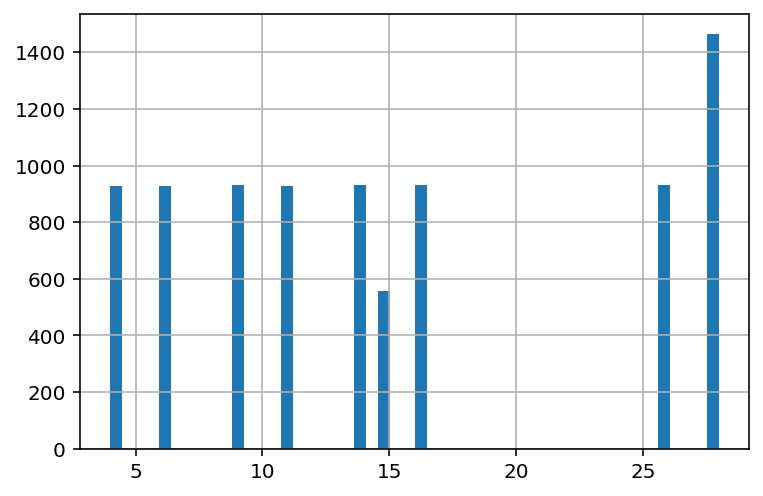

In [ ]:
train_df.Outlet_Establishment_Year.hist(bins=50)

In [ ]:
train_df.Outlet_Size.isnull().sum()

2410

In [ ]:
train_df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- 결측치를 Small 매장으로 대체한다.

In [ ]:
train_df['Outlet_Size'].fillna('Small',inplace=True) 

In [ ]:
train_df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# 상품명은 분석에서 제외
train_df.drop("Item_Identifier", axis=1, inplace=True)

In [ ]:
train_df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# 카테고리 변수 인코딩
# 먼저 타입이 cobjet인 카테고리 변수의 리스트를 만든다.
object_list = list(train_df.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
dummies = pd.get_dummies(train_df[object_list], prefix= object_list)

In [ ]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_low fat,1,0,1,0,1
Item_Fat_Content_regular,0,1,0,1,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0
Item_Type_Frozen Foods,0,0,0,0,0
Item_Type_Fruits and Vegetables,0,0,0,1,0
Item_Type_Hard Drinks,0,0,0,0,0


In [ ]:
# 원래의 열은 삭제하고 dummies 추가
X1 = train_df.drop(object_list, axis=1)

In [ ]:
X1.head(), X1.shape

(   Item_Weight  Item_Visibility  ...  Outlet_Establishment_Year  Item_Outlet_Sales
 0         9.30         0.016047  ...                         14          3735.1380
 1         5.92         0.019278  ...                          4           443.4228
 2        17.50         0.016760  ...                         14          2097.2700
 3        19.20         0.066132  ...                         15           732.3800
 4         8.93         0.066132  ...                         26           994.7052
 
 [5 rows x 5 columns], (8523, 5))

In [ ]:
X1, y = X1.drop('Item_Outlet_Sales',1), X1.Item_Outlet_Sales

In [ ]:
X1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,14
1,5.920,0.019278,48.2692,4
2,17.500,0.016760,141.6180,14
3,19.200,0.066132,182.0950,15
4,8.930,0.066132,53.8614,26
...,...,...,...,...
8518,6.865,0.056783,214.5218,26
8519,8.380,0.046982,108.1570,11
8520,10.600,0.035186,85.1224,9
8521,7.210,0.145221,103.1332,4


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [ ]:
X = pd.concat([pd.DataFrame(X1),dummies], axis =1)

In [ ]:
dummies.shape, X1.shape, X.shape 

((8523, 38), (8523, 4), (8523, 42))

In [ ]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183922
0.3459348199771226


In [ ]:
# 42개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.4930270429488
0.5490049177004621


### Residual plot
- 예측값에 대해 오차의 발생 형태가 랜덤하지 않고 비선형 성분이 많이 들어 있다. 그림에서 양수, 음수 그대로 보임.

Text(0.5, 1.0, 'Residual plot')

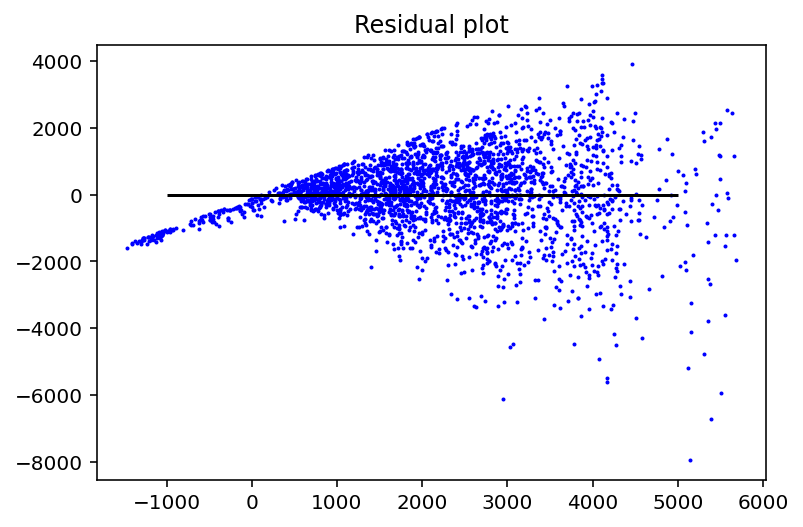

In [ ]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

- 전체 45개 특성 계수의 크기를 나열해 보자

In [ ]:
pd.Series(lreg.coef_, index=X.columns)

0                                 -8.916744e-01
1                                 -6.034198e+00
2                                  9.788771e+02
3                                  6.800754e+13
Item_Fat_Content_low fat          -7.195755e+12
Item_Fat_Content_regular          -7.195755e+12
Item_Type_Baking Goods            -2.948857e+13
Item_Type_Breads                  -2.948857e+13
Item_Type_Breakfast               -2.948857e+13
Item_Type_Canned                  -2.948857e+13
Item_Type_Dairy                   -2.948857e+13
Item_Type_Frozen Foods            -2.948857e+13
Item_Type_Fruits and Vegetables   -2.948857e+13
Item_Type_Hard Drinks             -2.948857e+13
Item_Type_Health and Hygiene      -2.948857e+13
Item_Type_Household               -2.948857e+13
Item_Type_Meat                    -2.948857e+13
Item_Type_Others                  -2.948857e+13
Item_Type_Seafood                 -2.948857e+13
Item_Type_Snack Foods             -2.948857e+13
Item_Type_Soft Drinks             -2.948

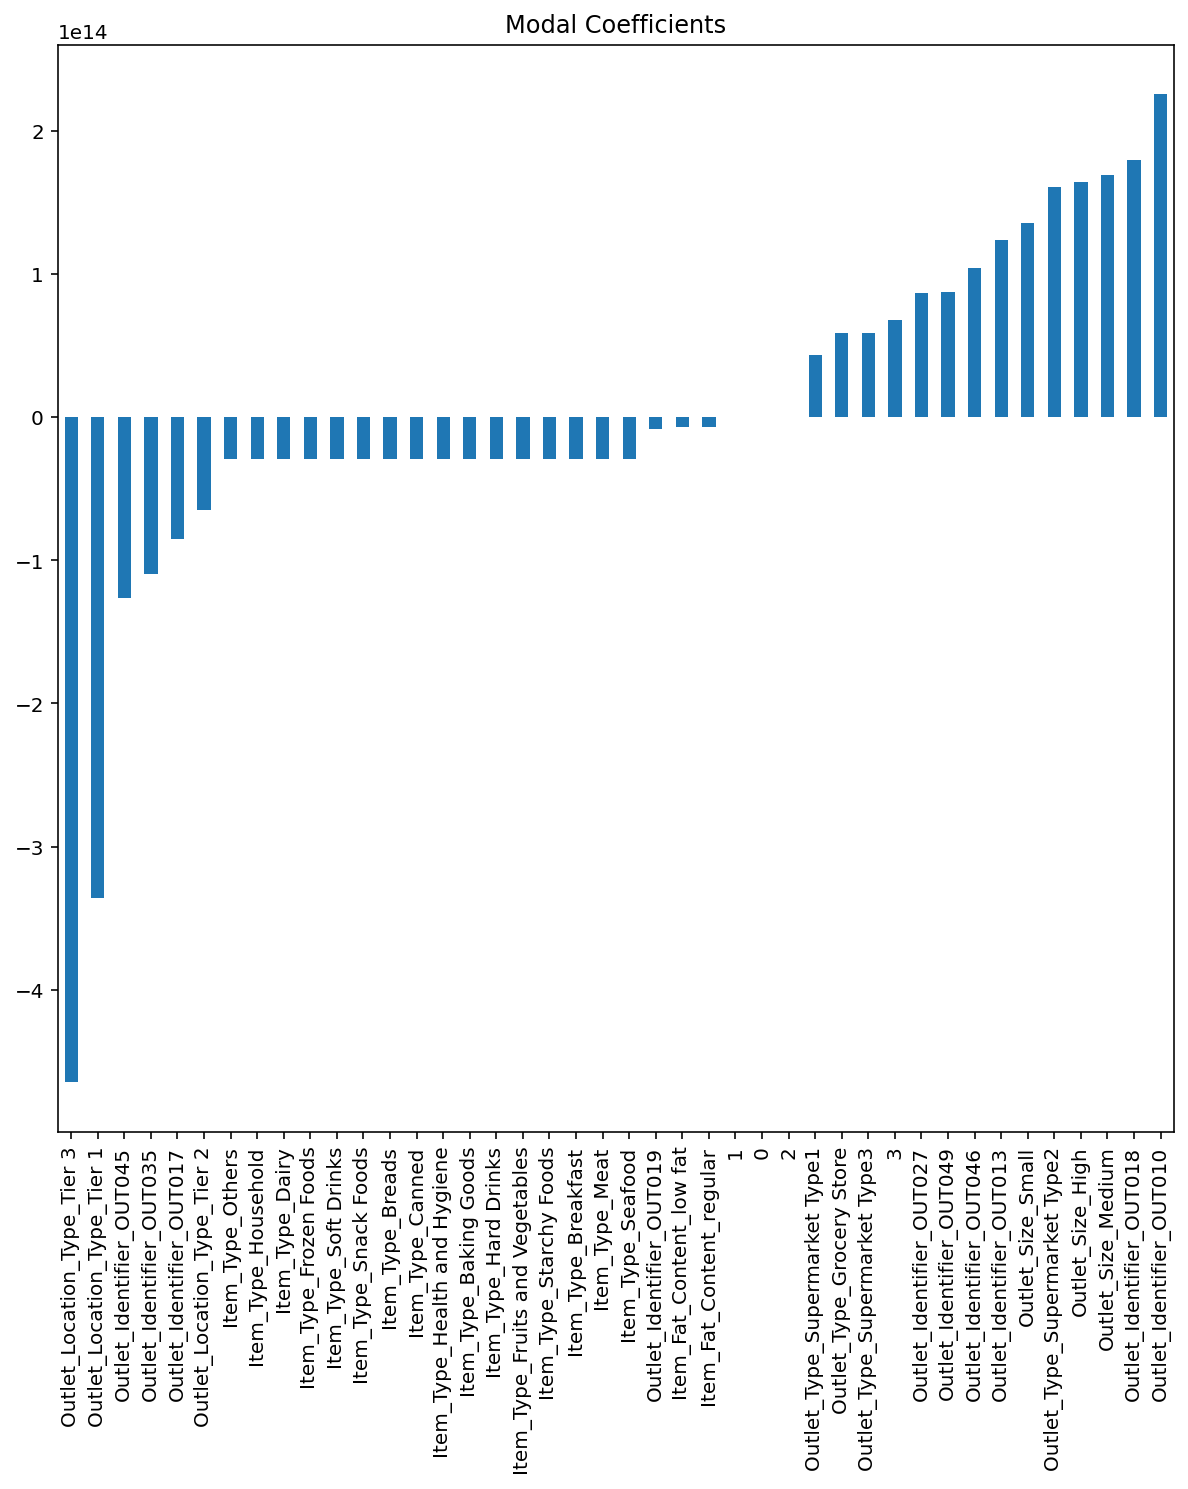

In [ ]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### Ridge regularize

In [ ]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True) 
# normalize: the regressors X will be normalized before regression by subtracting 
# the mean and dividing by the l2-norm
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1152.4930270429488, 0.5495004563058383)

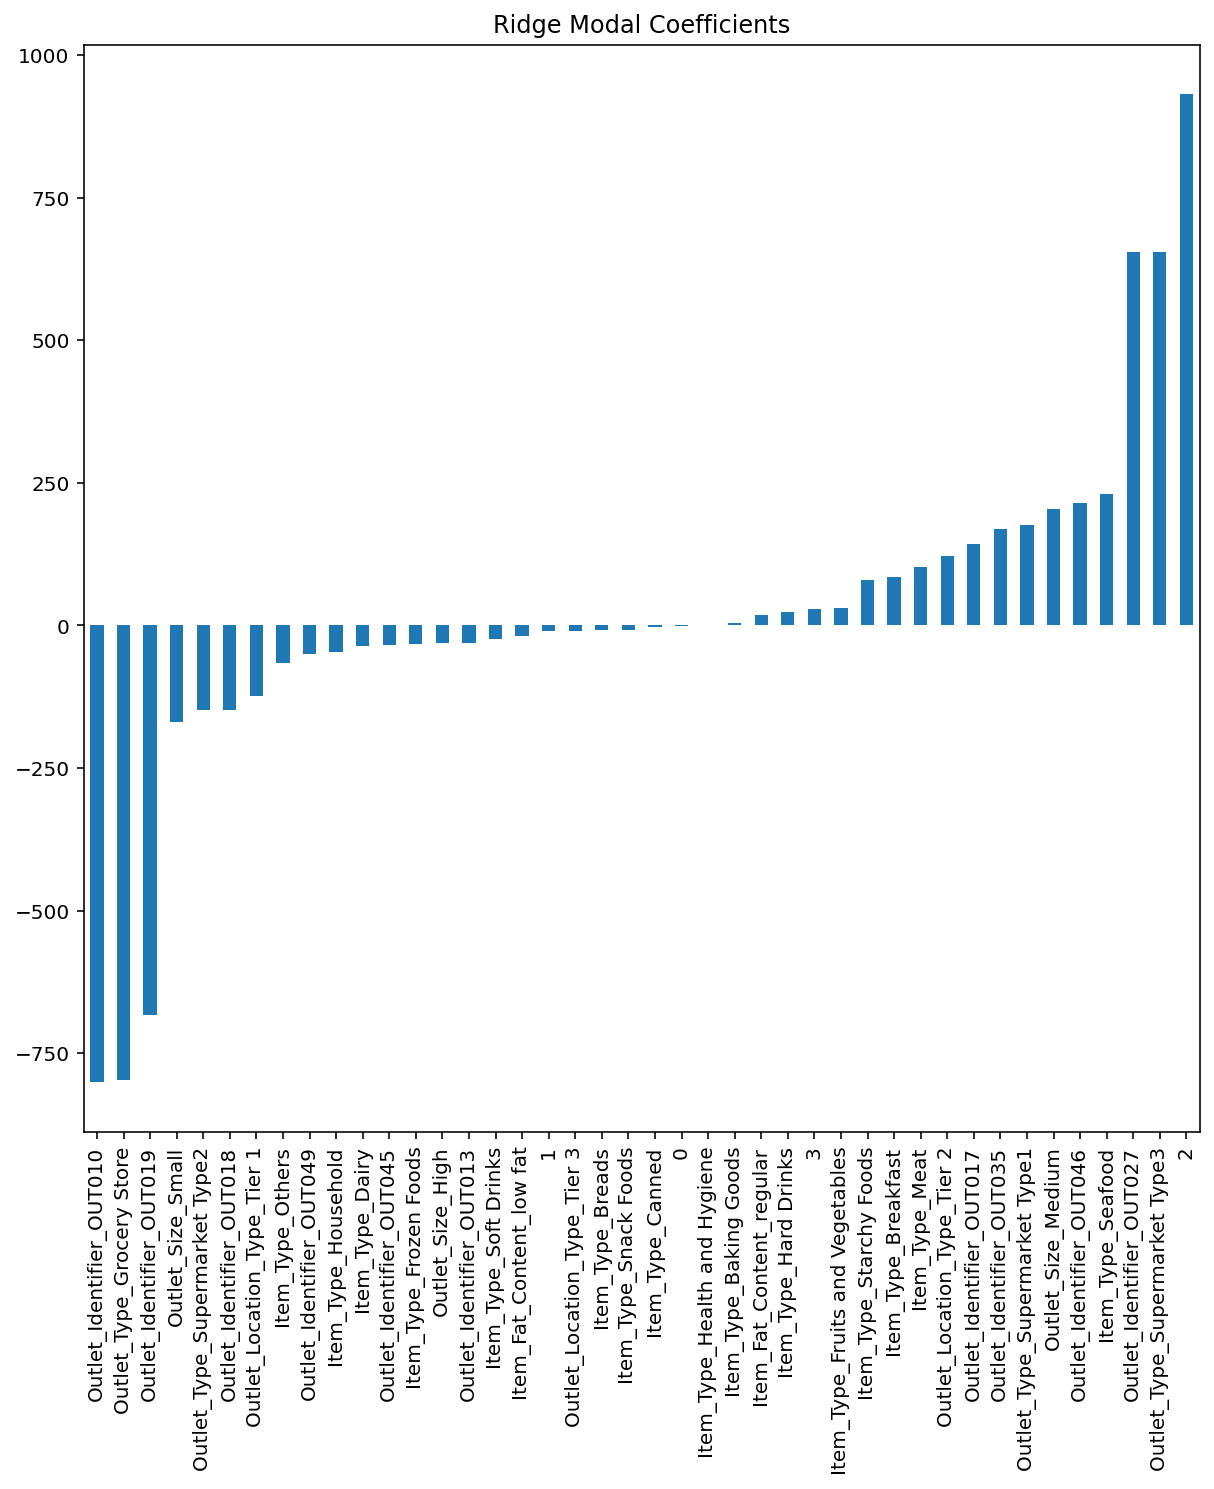

In [ ]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

- 위의 결과 -> 큰 계수의 값이 줄어듬을 확인할 수 있다.

In [ ]:
alpha = [0, 0.001, 0.01, 0.05, 0.5, 1, 5]
for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train,y_train)
    print("a= {:f},  R square = {} \t {}".format(
        a, ridgeReg.score(x_train, y_train), ridgeReg.score(x_test, y_test)))

a= 0.000000,  R square = 0.569432812928923 	 0.5490072197942049
a= 0.001000,  R square = 0.5694324363909957 	 0.5490358611216744
a= 0.010000,  R square = 0.5693958125960089 	 0.5492565097616726
a= 0.050000,  R square = 0.5685752940631754 	 0.5495004563058383
a= 0.500000,  R square = 0.5261082860407671 	 0.5138921412488433
a= 1.000000,  R square = 0.46831469488248445 	 0.4593005554836509
a= 5.000000,  R square = 0.23958697229285997 	 0.23616937164314356


### Lasso

In [ ]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5495984446704982


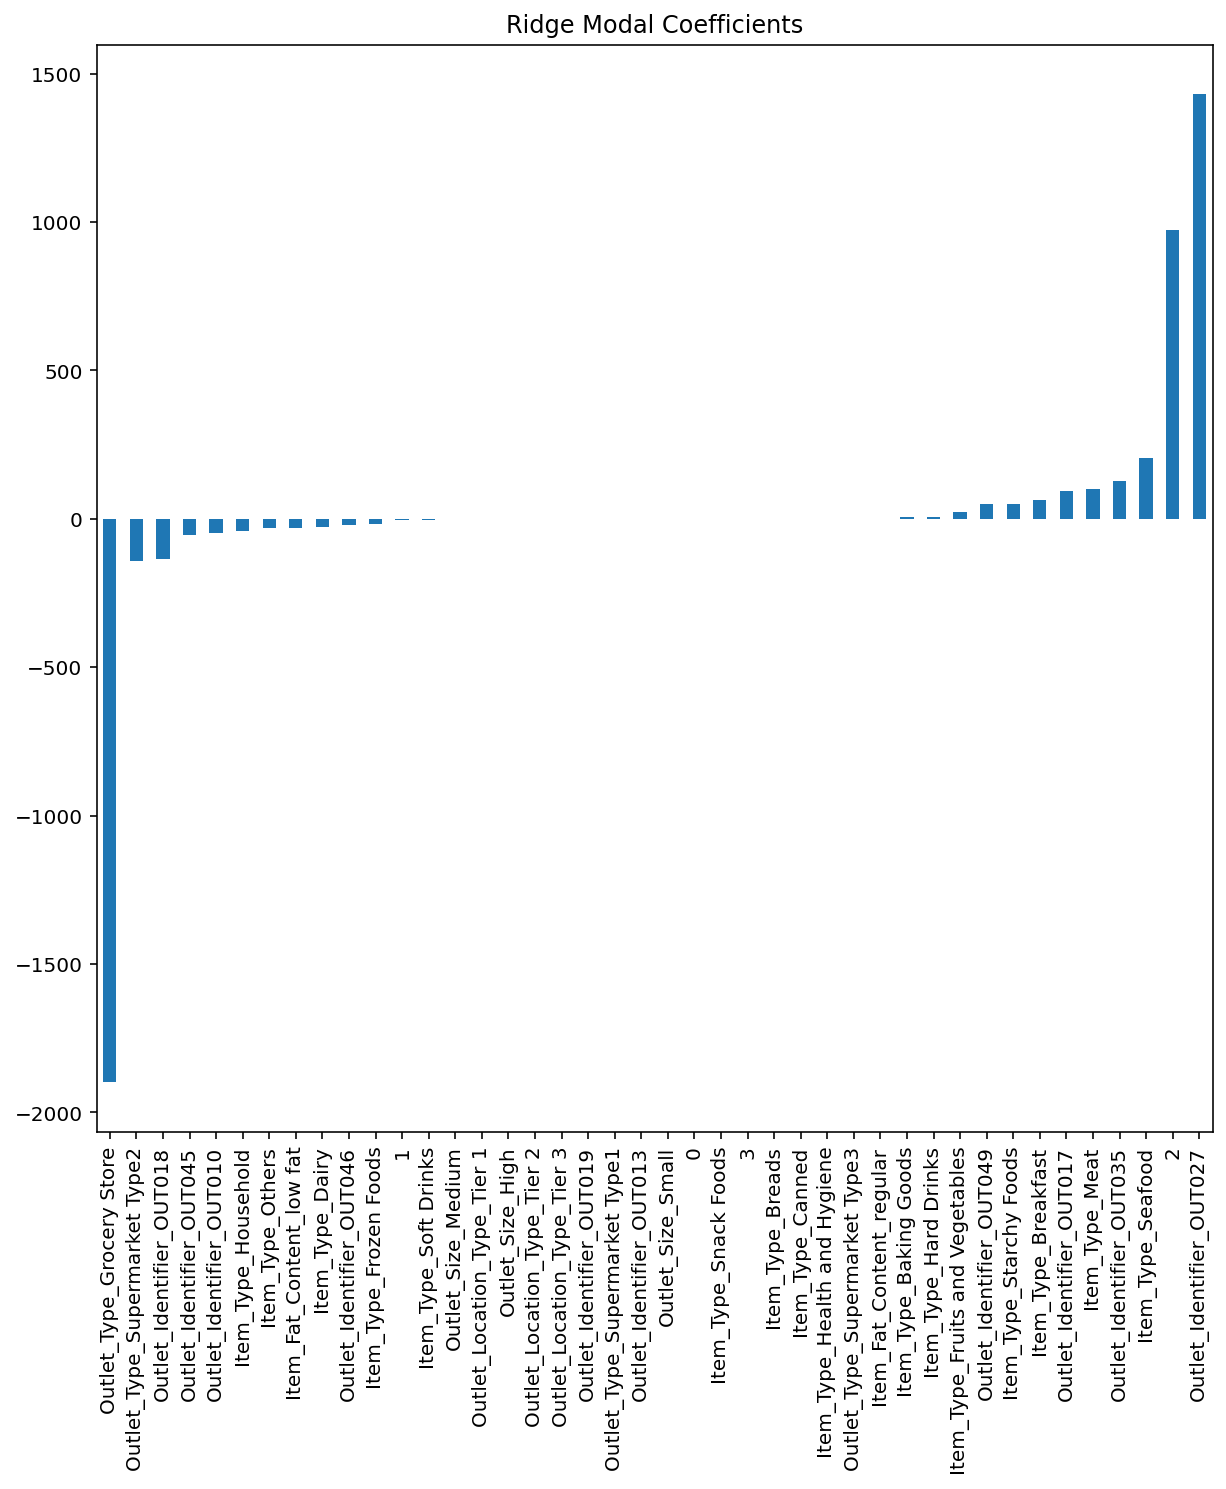

In [ ]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

- 결과 -> 중요도가 적은 계수의 크기가 줄어든 것 확인

## Another example
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

- RSS (residual sum of square): sum of square of error

In [30]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

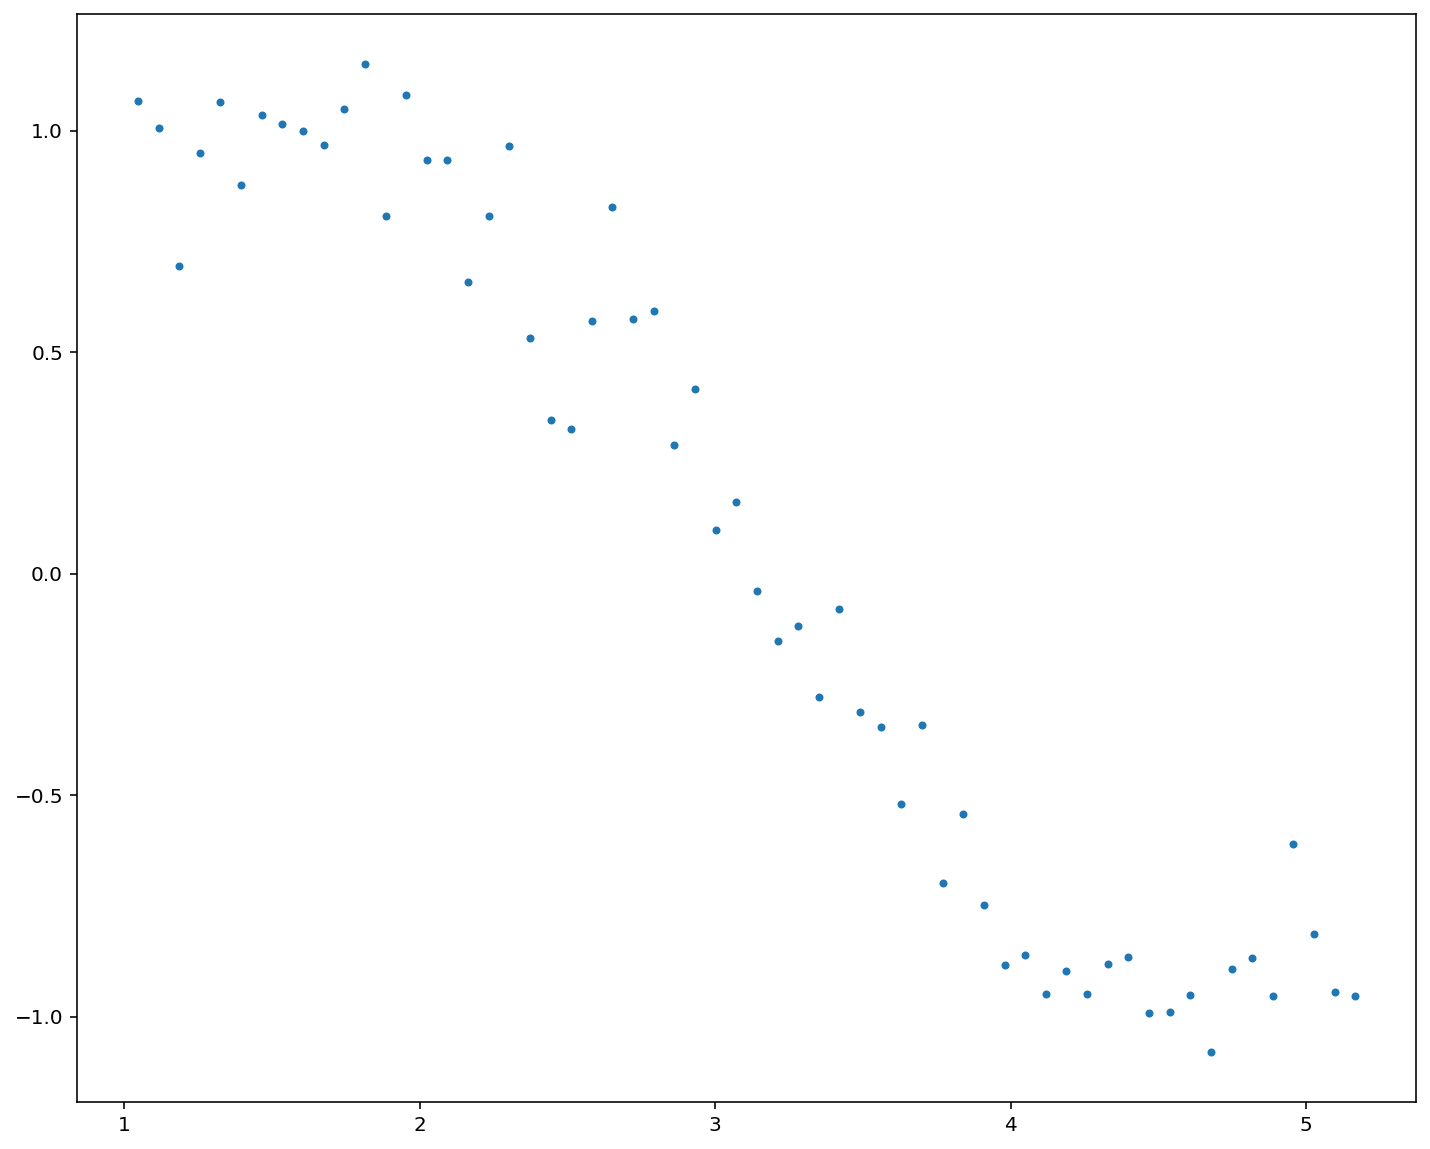

In [31]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

### Polynomial regression with powers of x from 1 to 15

In [32]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2  ...       x_13       x_14       x_15
0  1.047198  1.065763  1.096623  ...   1.821260   1.907219   1.997235
1  1.117011  1.006086  1.247713  ...   4.214494   4.707635   5.258479
2  1.186824  0.695374  1.408551  ...   9.268760  11.000386  13.055521
3  1.256637  0.949799  1.579137  ...  19.486248  24.487142  30.771450
4  1.326450  1.063496  1.759470  ...  39.353420  52.200353  69.241170

[5 rows x 16 columns]


In [34]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
     #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [35]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)


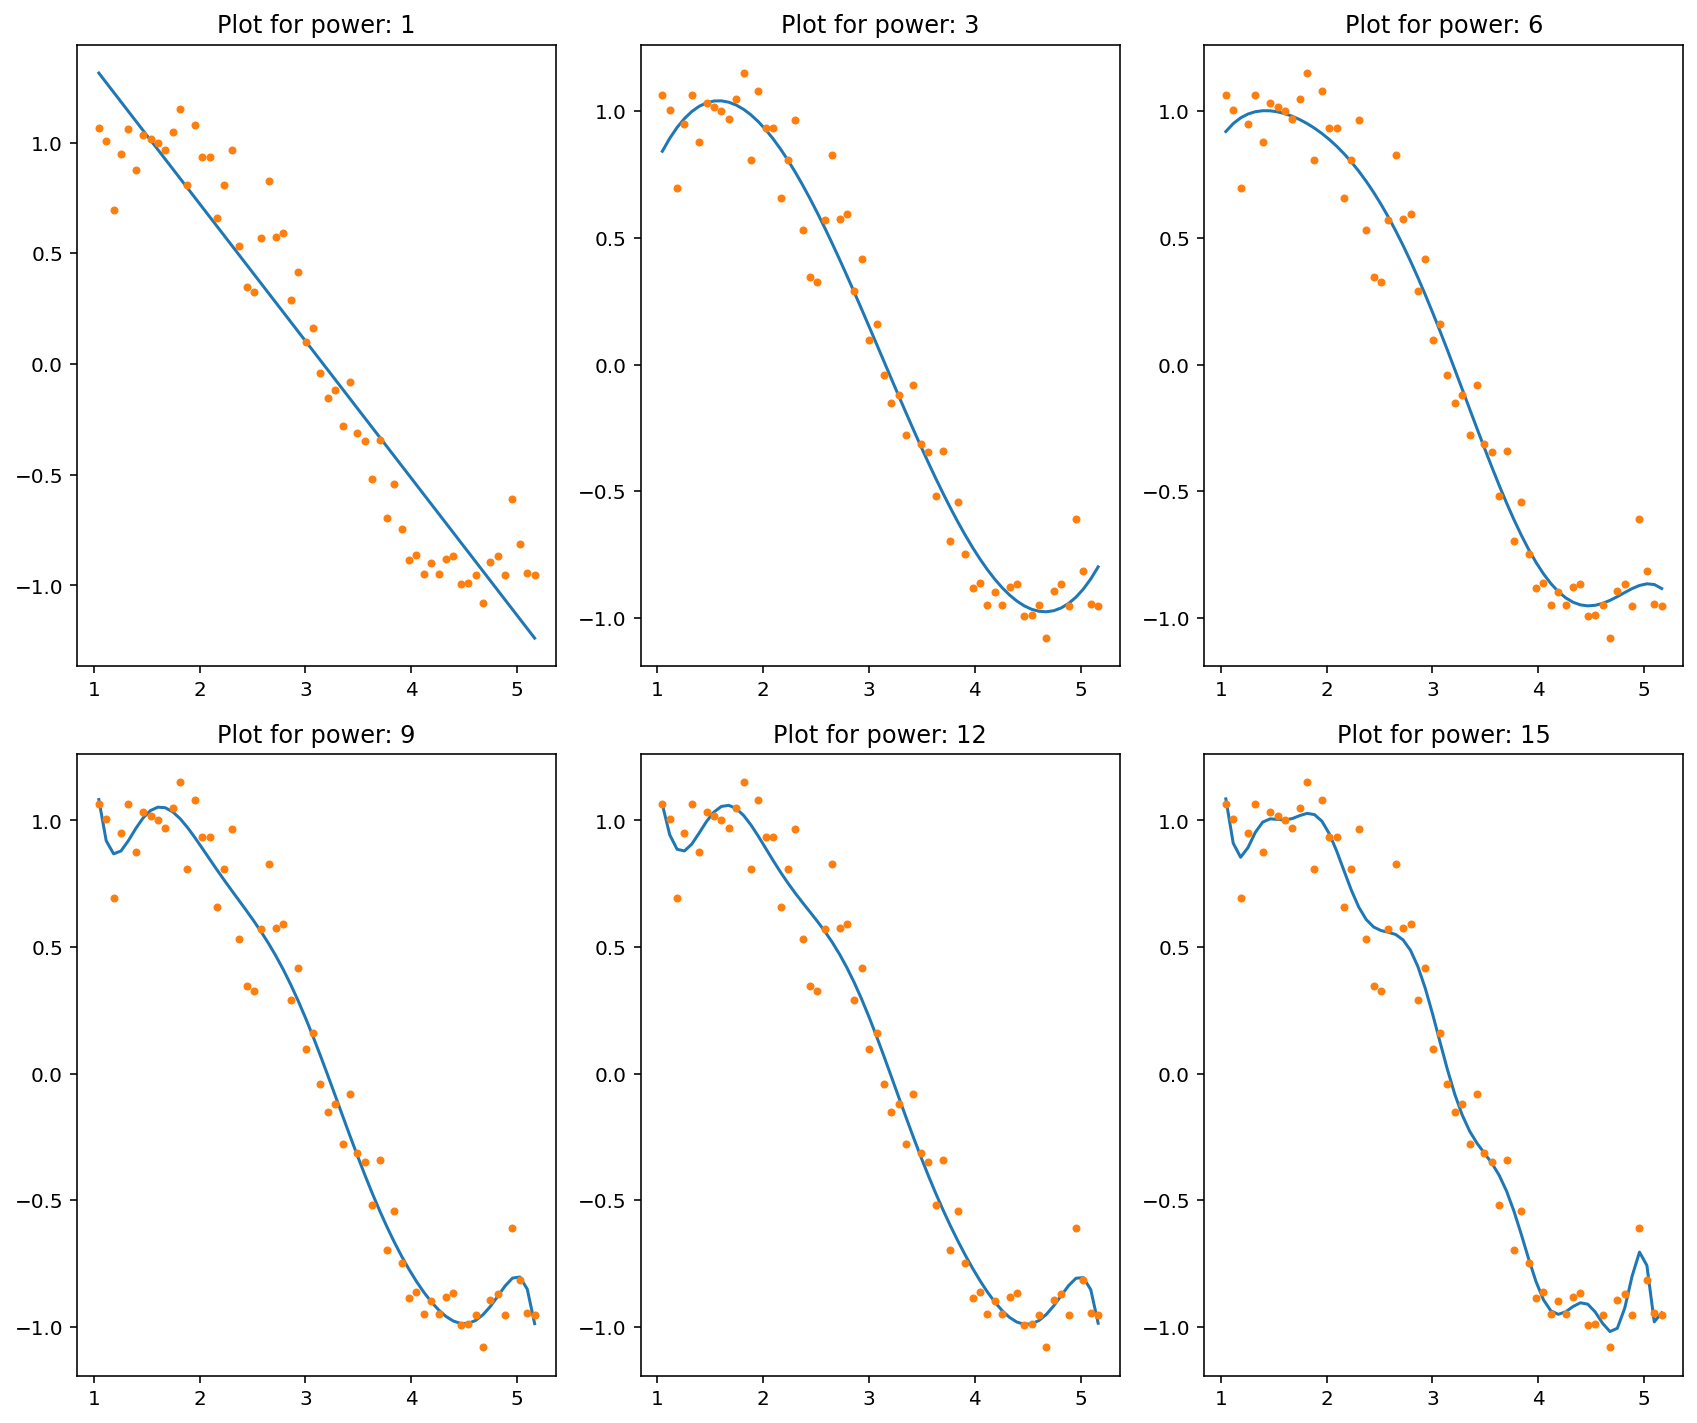

In [36]:
#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

- As the model complexity increases, the models tends to fit even smaller deviations in the training data set, possibly leading to overfitting.
- the size of coefficients increase exponentially with increase in model complexity.
- What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

### Ridge

In [37]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T


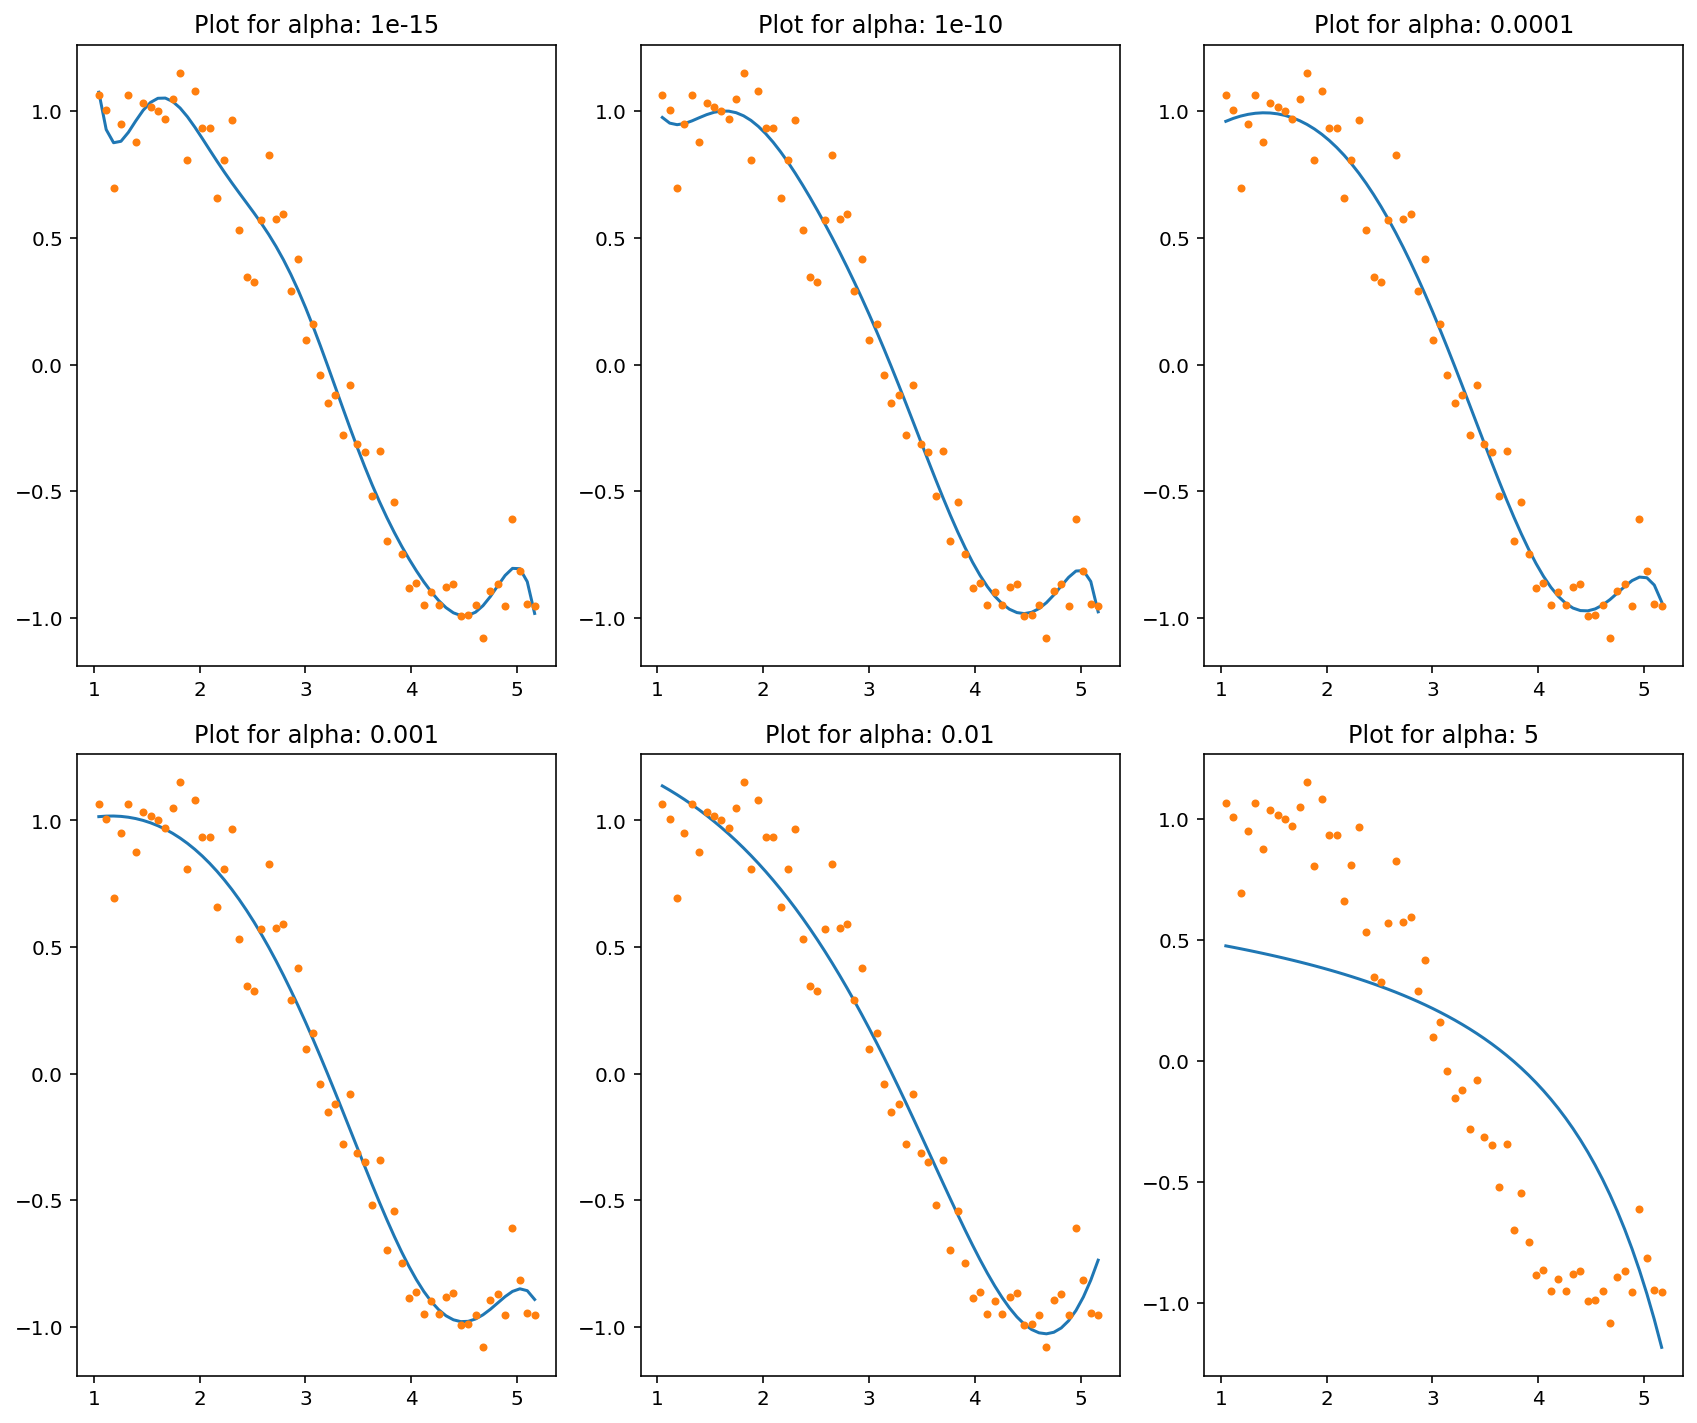

In [38]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [39]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.4e+02,68,-1.2,-3.7,0.3,0.19,-0.021,-0.0077,0.0011,0.00025,-6.3e-05,4.6e-06,-9e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


### Lasso

In [41]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259036853, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399057239, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190410706, tolerance: 0.00369480384218441
  positive)


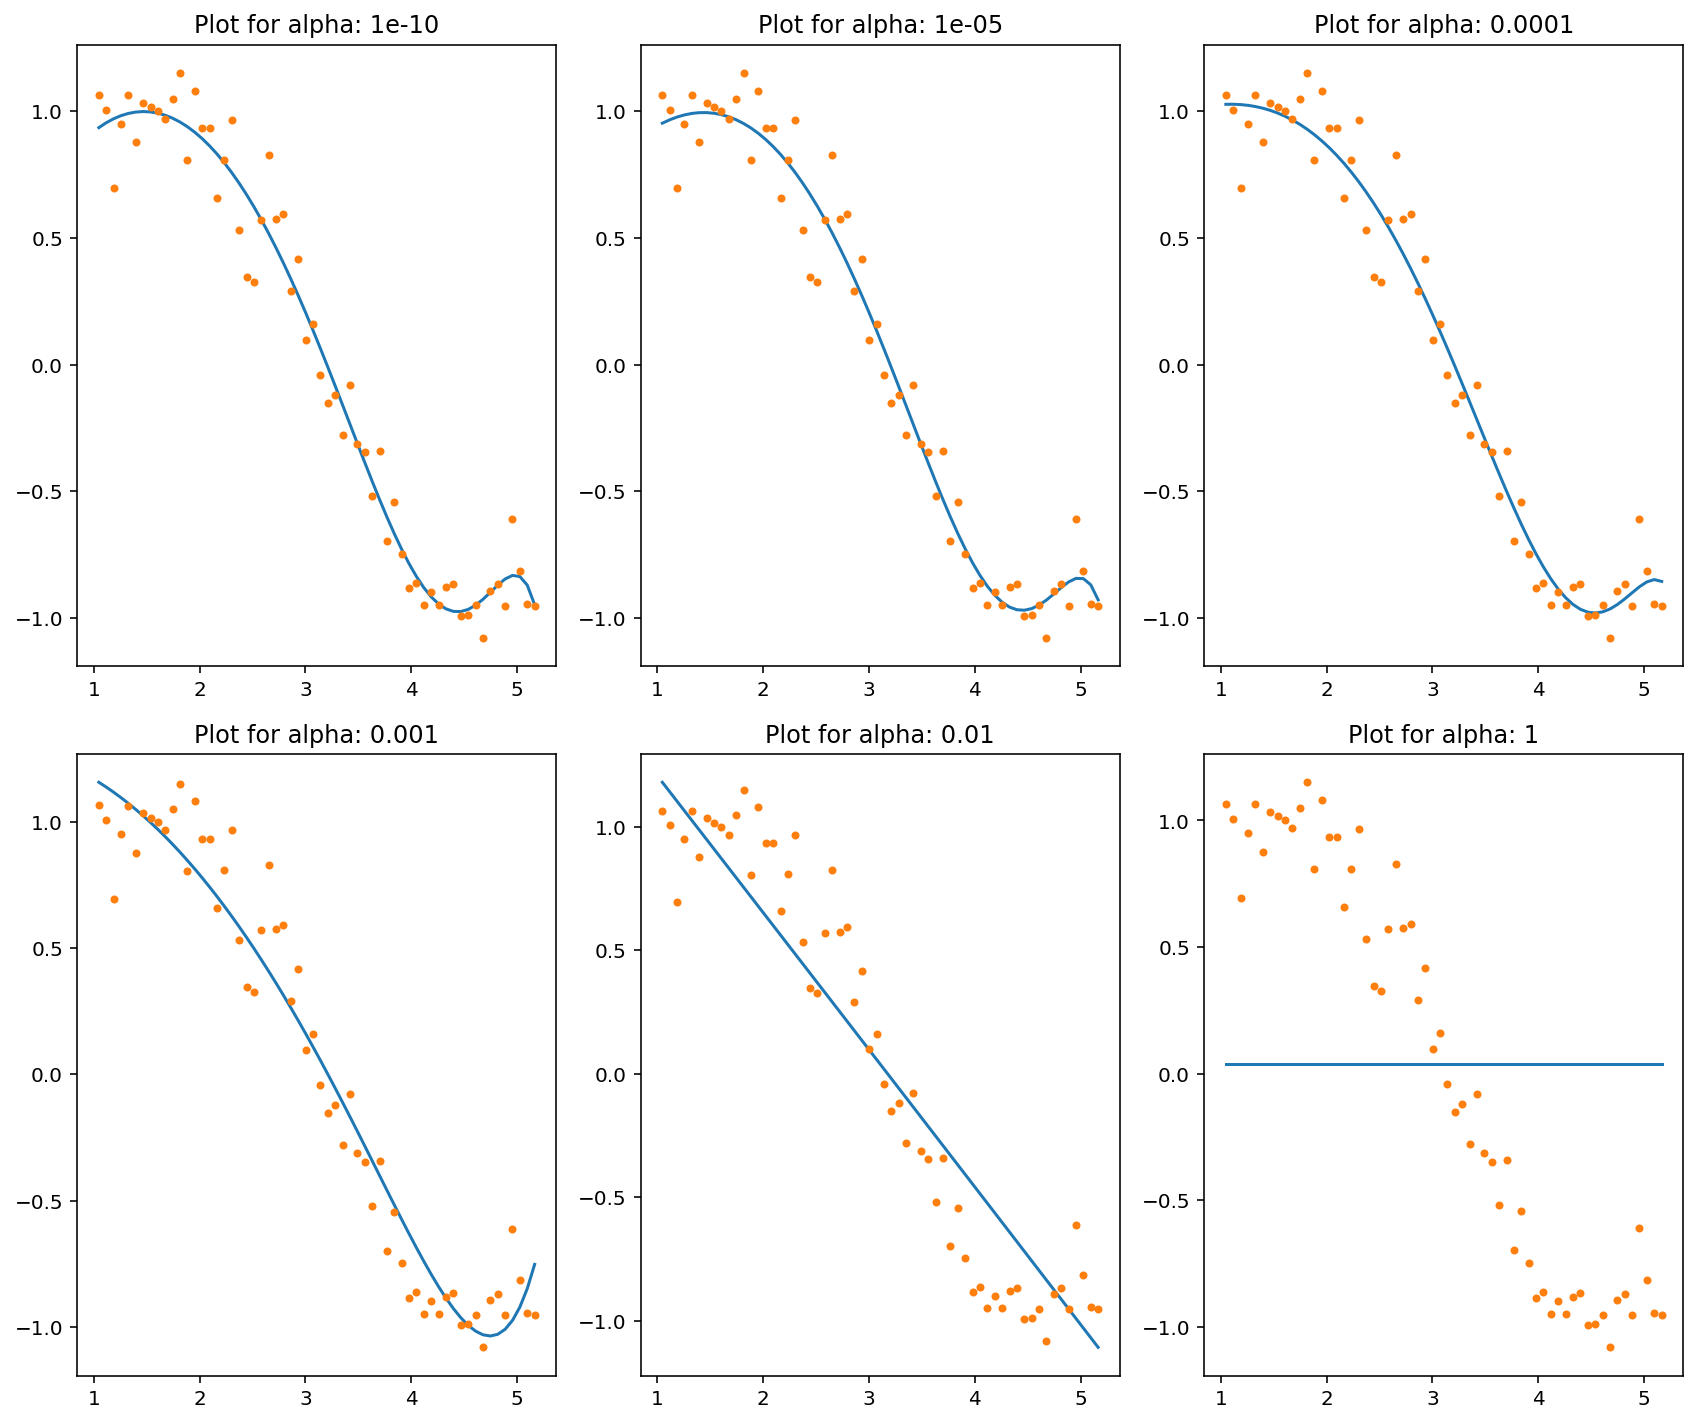

In [42]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [43]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [ ]:
data.shape

(60, 16)

In [44]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

- Conclusion
  - Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is **coefficient shrinkage** and **reducing model complexity**.
  - Lasso: Along with **shrinking coefficients**, lasso performs **feature selection** as well. (Remember the ‘selection‘ in the lasso full-form) As we observed, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

- Typical use cases:
  - Ridge: It is majorly used to **prevent overfitting**. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
  - Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.